- This notebook is meant to illustrate the basic functionalities of the optimizer.

---

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("..")
from psoas.optimizer import Optimizer

In [4]:
def function(x, a=1, b=100):
    """The 2-dimensional rosenbrock function as an example.
    
    Within the optimizer it is assumed that the function is always evaluated for one data
    point at a time and not with an input matrix which holds a multitude of points. Therefore
    we will implement the rosenbrock function with this assumption in mind.
    """
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2


# somewhat arbitrary constraints for the rosenbrock function

constr = np.array([[-2, 2], 
                   [-1, 3]])

---
## Most basic use case:
- follows the SPSO2011 update rule

In [5]:
n_particles = 30
dim = 2
max_iter = 20

# disable the surrogate model for the first test:
surrogate_options={'use_surrogate': False}

opt = Optimizer(function, n_particles, dim, constr, max_iter, verbose=True, surrogate_options=surrogate_options)
res = opt.optimize()

print('proposed optimum:', res['x_opt'])
print('with value:', res['func_opt'])


 Options:
{'do_plots': False,
 'eps_abs': 0.0,
 'eps_rel': 0.0,
 'eval_convergence_plot': False,
 'stalling_steps': 10,
 'surrogate_options': {'3d_plot': False,
                       'buffer_type': 'time',
                       'interval': 1,
                       'm': 5,
                       'n_slots': 4,
                       'prioritization': 0.2,
                       'proposition_mode': 'standard',
                       'surrogate_type': 'GP',
                       'use_buffer': True,
                       'use_surrogate': False},
 'swarm_options': {'contour_plot': False,
                   'create_gif': False,
                   'mode': 'SPSO2011',
                   'topology': 'global'},
 'verbose': True,
 'verbose_interval': 1}

╭──────────────────────┬──────────────────────┬──────────────────────┬──────────────────────╮
│                  idx │                gbest │           mean_pbest │            var_pbest │
├──────────────────────┼──────────────────────┼──────

---
## With surrogate:
- uses the propositions of the surrogate to try and predict good positions for the particles of the swarm
- should generally be used for functions where a function evaluation takes more than a few milliseconds,
    otherwise more function evaluations might be preferable

In [6]:
n_particles = 30
dim = 2
max_iter = 20

opt = Optimizer(function, n_particles, dim, constr, max_iter, verbose=True)
res = opt.optimize()

print('proposed optimum:', res['x_opt'])
print('with value:', res['func_opt'])


 Options:
{'do_plots': False,
 'eps_abs': 0.0,
 'eps_rel': 0.0,
 'eval_convergence_plot': False,
 'stalling_steps': 10,
 'surrogate_options': {'3d_plot': False,
                       'buffer_type': 'time',
                       'interval': 1,
                       'm': 5,
                       'n_slots': 4,
                       'prioritization': 0.2,
                       'proposition_mode': 'standard',
                       'surrogate_type': 'GP',
                       'use_buffer': True,
                       'use_surrogate': True},
 'swarm_options': {'contour_plot': False,
                   'create_gif': False,
                   'mode': 'SPSO2011',
                   'topology': 'global'},
 'verbose': True,
 'verbose_interval': 1}

╭──────────────────────┬──────────────────────┬──────────────────────┬──────────────────────╮
│                  idx │                gbest │           mean_pbest │            var_pbest │
├──────────────────────┼──────────────────────┼───────

---
## Basic options:
- showcases some further functionalities
- the options can be given as simple keywords directly to the function or using a python dictionary
- all options are described in the documentation of the Optimizer class

---
- convergence plots for global best and statistics for the personal bests of the swarm

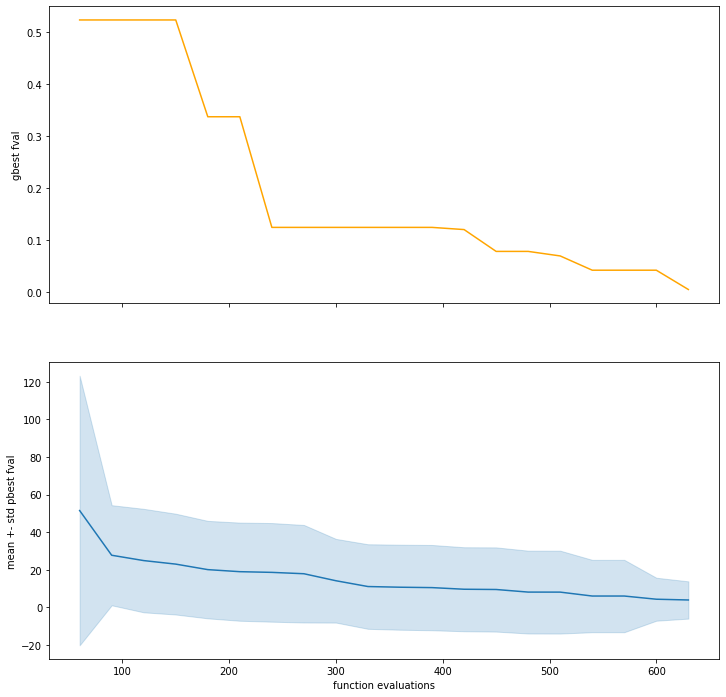

In [7]:
options = {'verbose': False,
           'verbose_interval': 1,
           'do_plots': True,
           'swarm_options': {'mode': 'SPSO2011', 
                             'topology': 'global',
                             'contour_plot': False,
                             'create_gif': False},
           'surrogate_options': {'surrogate_type': 'GP',
                                 'use_surrogate': False,
                                 'use_buffer': True,
                                 'buffer_type': 'time',
                                 'n_slots': 4,
                                 '3d_plot': False,
                                 'interval': 1,
                                 'm': 5,
                                 'proposition_mode': 'standard',
                                 'prioritization': 0.2}
           }

n_particles = 30
dim = 2
max_iter = 20

opt = Optimizer(function, n_particles, dim, constr, max_iter, **options)
res = opt.optimize()

---
- plot of mean and variance predictions from the surrogate (only for 2d functions)
- see eg. https://en.wikipedia.org/wiki/Rosenbrock_function for a 3d plot of the actual function

In [8]:
options = {'verbose': False,
           'verbose_interval': 1,
           'do_plots': False,
           'swarm_options': {'mode': 'SPSO2011', 
                             'topology': 'global',
                             'contour_plot': False,
                             'create_gif': False},
           'surrogate_options': {'surrogate_type': 'GP',
                                 'use_surrogate': True,
                                 'use_buffer': True,
                                 'buffer_type': 'time',
                                 'n_slots': 4,
                                 '3d_plot': True,
                                 'interval': 1,
                                 'm': 5,
                                 'proposition_mode': 'standard',
                                 'prioritization': 0.2}
           }

n_particles = 15
dim = 2
max_iter = 5

opt = Optimizer(function, n_particles, dim, constr, max_iter, **options)
res = opt.optimize()

********************************************************************************


********************************************************************************
********************************************************************************


********************************************************************************
********************************************************************************


********************************************************************************
********************************************************************************


********************************************************************************
********************************************************************************


********************************************************************************


---
- Contour plot of the function and the particles (only for 2d functions)

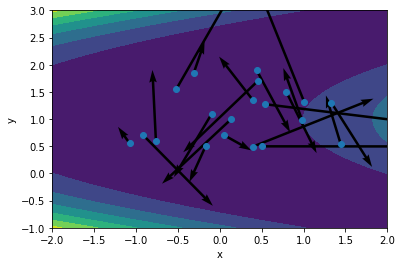

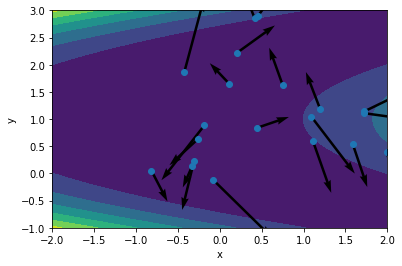

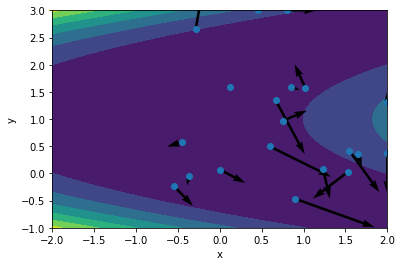

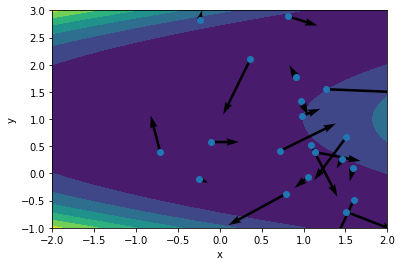

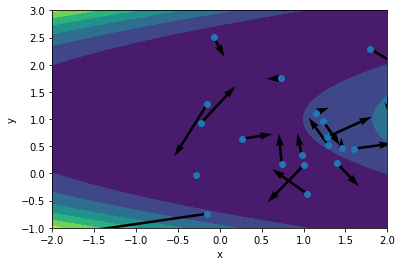

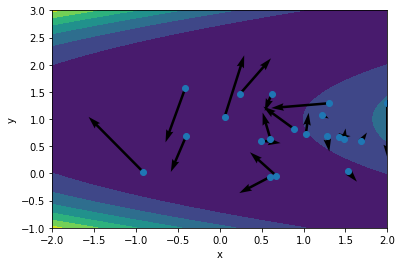

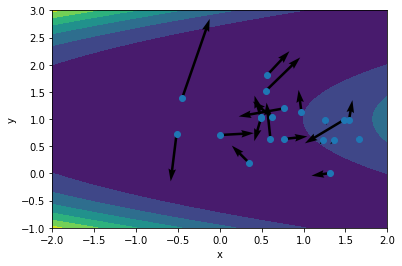

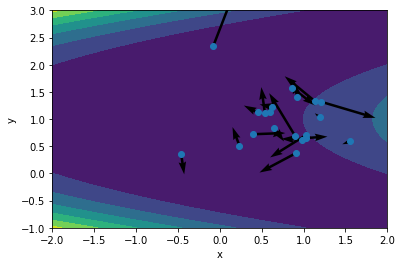

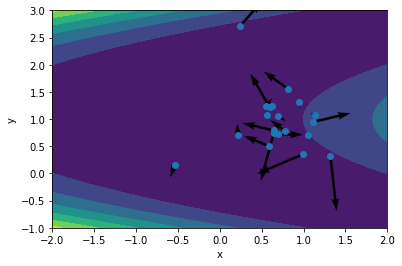

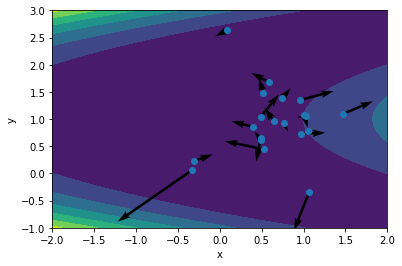

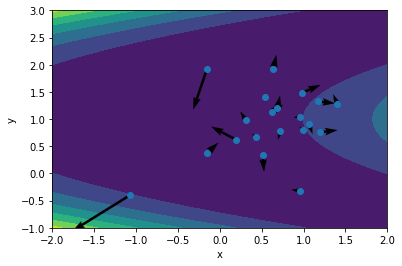

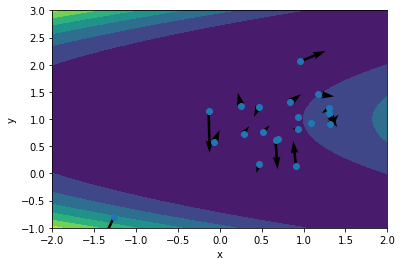

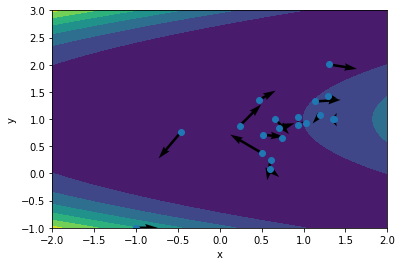

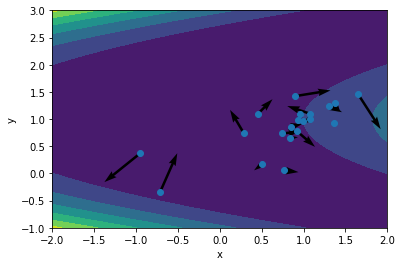

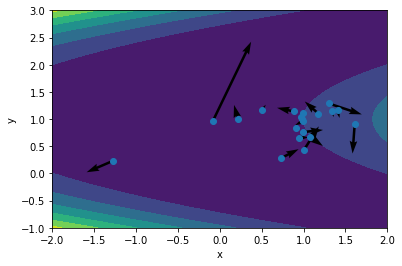

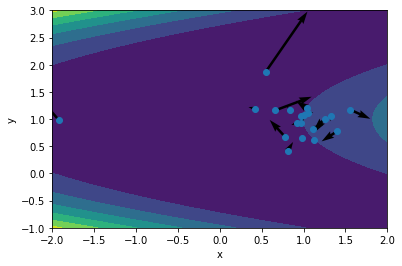

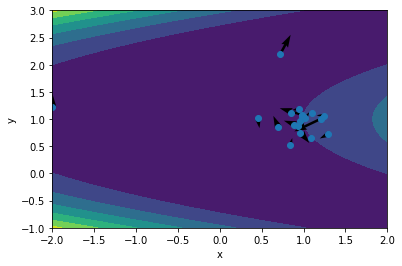

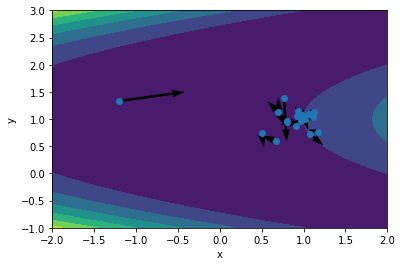

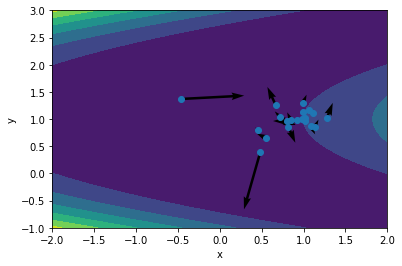

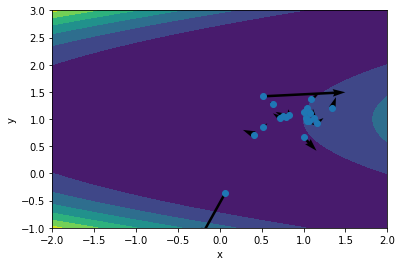

In [9]:
options = {'verbose': False,
           'verbose_interval': 1,
           'do_plots': False,
           'swarm_options': {'mode': 'SPSO2011', 
                             'topology': 'global',
                             'contour_plot': True,
                             'create_gif': False},
           'surrogate_options': {'surrogate_type': 'GP',
                                 'use_surrogate': False,
                                 'use_buffer': True,
                                 'buffer_type': 'time',
                                 'n_slots': 4,
                                 '3d_plot': True,
                                 'interval': 1,
                                 'm': 5,
                                 'proposition_mode': 'standard',
                                 'prioritization': 0.2}
           }

n_particles = 20
dim = 2
max_iter = 20

opt = Optimizer(function, n_particles, dim, constr, max_iter, **options)
res = opt.optimize()